In [1]:
# Importing Necessary Libraries
import numpy as np
from qiskit.opflow import X, Y, Z, I,  commutator
from qiskit_nature.units import DistanceUnit
from qiskit_nature.second_q.drivers import PySCFDriver
from qiskit_nature.second_q.mappers import JordanWignerMapper, QubitConverter
from qiskit_nature.second_q.algorithms import GroundStateEigensolver, NumPyMinimumEigensolverFactory
from qiskit.extensions import UnitaryGate
import matplotlib.pyplot as plt
import pickle
import pandas as pd

<frozen importlib._bootstrap>:219: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject


In [2]:
'''Helper Functions'''

# Converts degree into radians
def rad(theta):
    return theta*(np.pi/180)

# Feed in any list of molecules and their geometry to get a string with the information.
def atomlist(coordinates):
    term = ''
    for i in coordinates:
        term += ';'
        for j in i:
            term += ' '
            term += str(j)
    return term[2:]

# GroundStateEigensolver setup for the atom described
def GroundState(atom):
    driver = PySCFDriver(atom=atom,basis="sto3g",charge=0,spin=0,unit=DistanceUnit.ANGSTROM)
    problem = driver.run()
    solver = GroundStateEigensolver(QubitConverter(JordanWignerMapper()),NumPyMinimumEigensolverFactory())
    return solver.solve(problem)

# Information of molecules at Equilibrium Position
lih  = atomlist([['Li',0,0,0], ['H',0,0,1.595]])
h2o  = atomlist([['O',0,0,0],  ['H',0,0,0.9572], ['H',0, 0.9572*np.sin(rad(104.52)), 0.9572*np.cos(rad(104.52))]])
beh2 = atomlist([['Be',0,0,0], ['H',0,0,1.3264], ['H',0, 1.3264*np.sin(rad(180)),    1.3264*np.cos(rad(180))]])
ch2  = atomlist([['C',0,0,0],  ['H',0,0,1.0849],  ['H',0, 1.0849*np.sin(rad(135.5)),   1.0849*np.cos(rad(135.5))]])

In [3]:
def GSE():
    gse_result = []
    distance = []
    dipole_moment = []
    repulsion = []
    electronic = []

    for i in range(17,20):
        
        #Edit this part as you change the atom or fix any variable
        dist = 0.5+(i*3/20)
        atom  = atomlist([['O',0,0,0],  ['H',0,0,dist], ['H',0,dist*np.sin(rad(104.52)), dist*np.cos(rad(104.52))]])
        distance.append(0.5+(i*3/20))
        print(dist)
    
        elec = GroundState(atom)
        print(dist)
        gse_result.append(elec.total_energies[0])
        dipole_moment.append(elec.total_dipole_moment_in_debye[0])
        repulsion.append(elec.nuclear_repulsion_energy)
        electronic.append(elec.groundenergy)
        
    return gse_result, dipole_moment, repulsion, electronic, distance

In [69]:
# to save variables
with open('GroundState-H2O.pkl','wb') as file:
    pickle.dump(GS,file)

# LiH Molecule

In [3]:
# Data for LiH
with open('GroundState-LiH.pkl','rb') as file:
    GS = pickle.load(file)
data = pd.DataFrame(GS).T
num = data.T.to_numpy()
data.columns = ['Ground State Energy', 'Dipole Moment', 'Nuclear Repulsion Energy', 'Electronic Energy', 'Distance']
data.set_index('Distance', inplace = True)
data.head()

,Ground State Energy,Dipole Moment,Nuclear Repulsion Energy,Electronic Energy
Distance,,,,
0.50,-7.050225,5.199810,3.175063,-10.225288
0.65,-7.420603,5.121773,2.442356,-9.862959
0.80,-7.634167,4.849593,1.984415,-9.618582
0.95,-7.756886,4.742862,1.671086,-9.427972
1.10,-7.825537,4.696698,1.443211,-9.268748


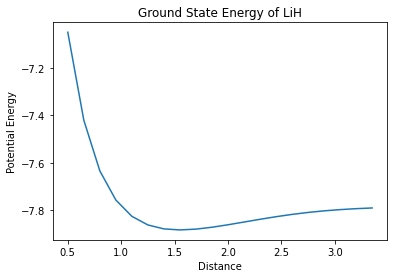

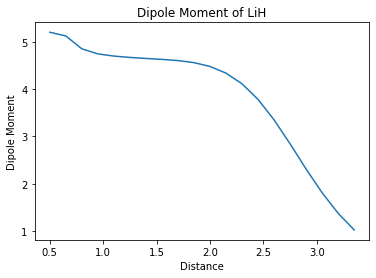

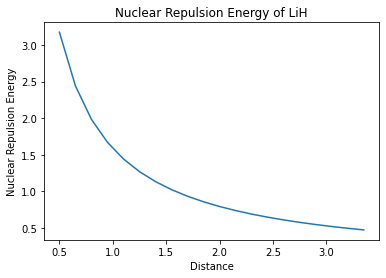

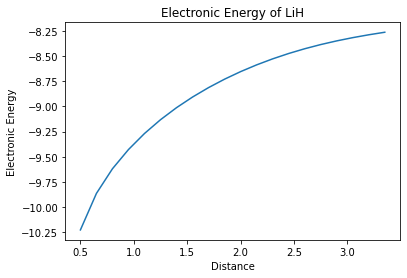

In [4]:
# plots for LiH
plt.xlabel('Distance')
plt.ylabel('Potential Energy')
plt.title('Ground State Energy of LiH')
plt.plot(num[4],num[0])
plt.show()

plt.xlabel('Distance')
plt.ylabel('Dipole Moment')
plt.title('Dipole Moment of LiH')
plt.plot(num[4],num[1])
plt.show()

plt.xlabel('Distance')
plt.ylabel('Nuclear Repulsion Energy')
plt.title('Nuclear Repulsion Energy of LiH')
plt.plot(num[4],num[2])
plt.show()

plt.xlabel('Distance')
plt.ylabel('Electronic Energy')
plt.title('Electronic Energy of LiH')
plt.plot(num[4],num[3])
plt.show()

# BeH2 Molecule

In [5]:
# Data for BeH2
with open('GroundState-BeH2.pkl','rb') as file:
    GS = pickle.load(file)
data = pd.DataFrame(GS).T
num = data.T.to_numpy()
data.columns = ['Ground State Energy', 'Dipole Moment', 'Nuclear Repulsion Energy', 'Electronic Energy', 'Distance']
data.set_index('Distance', inplace = True)
data.head()

,Ground State Energy,Dipole Moment,Nuclear Repulsion Energy,Electronic Energy
Distance,,,,
0.50,-13.689960,0.0,8.996013,-22.685973
0.65,-14.663301,0.0,6.920010,-21.583311
0.80,-15.172805,0.0,5.622508,-20.795313
0.95,-15.430428,0.0,4.734743,-20.165172
1.10,-15.549638,0.0,4.089097,-19.638735


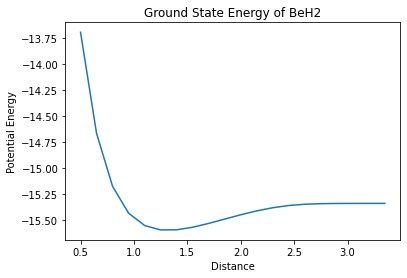

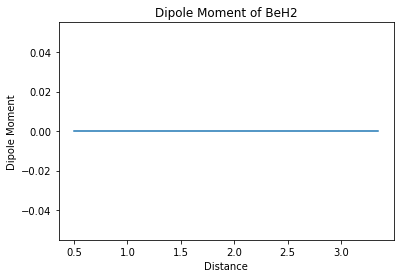

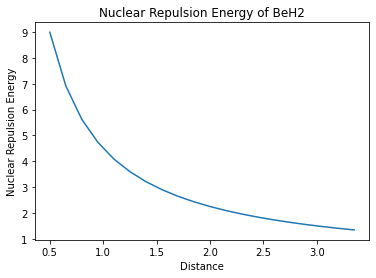

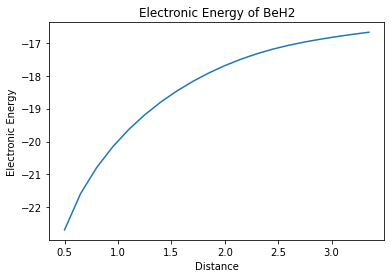

In [6]:
plt.xlabel('Distance')
plt.ylabel('Potential Energy')
plt.title('Ground State Energy of BeH2')
plt.plot(num[4],num[0])
plt.show()

plt.xlabel('Distance')
plt.ylabel('Dipole Moment')
plt.title('Dipole Moment of BeH2')
plt.plot(num[4],num[1])
plt.show()

plt.xlabel('Distance')
plt.ylabel('Nuclear Repulsion Energy')
plt.title('Nuclear Repulsion Energy of BeH2')
plt.plot(num[4],num[2])
plt.show()

plt.xlabel('Distance')
plt.ylabel('Electronic Energy')
plt.title('Electronic Energy of BeH2')
plt.plot(num[4],num[3])
plt.show()

# CH2 Molecule

In [7]:
# Data for CH2
with open('GroundState-CH2.pkl','rb') as file:
    GS = pickle.load(file)
data = pd.DataFrame(GS).T
num = data.T.to_numpy()
data.columns = ['Ground State Energy', 'Dipole Moment', 'Nuclear Repulsion Energy', 'Electronic Energy', 'Distance']
data.set_index('Distance', inplace = True)
data.head()

,Ground State Energy,Dipole Moment,Nuclear Repulsion Energy,Electronic Energy
Distance,,,,
0.50,-36.388726,0.147466,13.272002,-49.660729
0.65,-37.695066,0.059390,10.209233,-47.904298
0.80,-38.230693,0.164258,8.295002,-46.525694
0.95,-38.428067,0.216164,6.985264,-45.413332
1.10,-38.472740,0.238091,6.032728,-44.505468


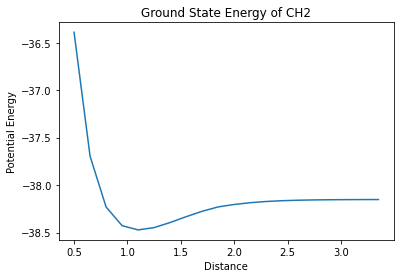

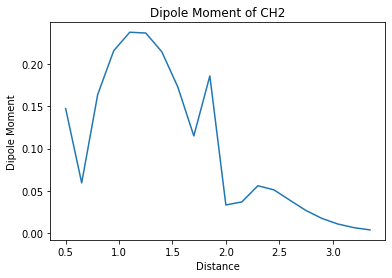

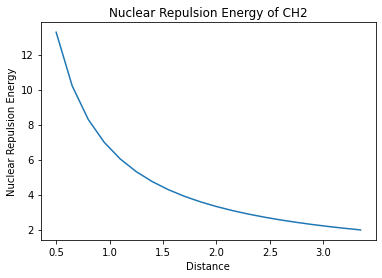

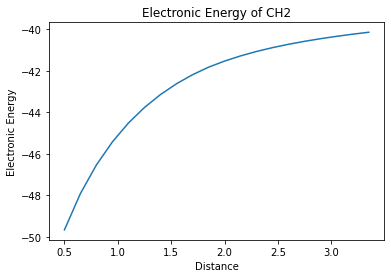

In [8]:
plt.xlabel('Distance')
plt.ylabel('Potential Energy')
plt.title('Ground State Energy of CH2')
plt.plot(num[4],num[0])
plt.show()

plt.xlabel('Distance')
plt.ylabel('Dipole Moment')
plt.title('Dipole Moment of CH2')
plt.plot(num[4],num[1])
plt.show()

plt.xlabel('Distance')
plt.ylabel('Nuclear Repulsion Energy')
plt.title('Nuclear Repulsion Energy of CH2')
plt.plot(num[4],num[2])
plt.show()

plt.xlabel('Distance')
plt.ylabel('Electronic Energy')
plt.title('Electronic Energy of CH2')
plt.plot(num[4],num[3])
plt.show()

# H2O Molecule

In [9]:
# Data for H2O
with open('GroundState-H2O.pkl','rb') as file:
    GS = pickle.load(file)
data = pd.DataFrame(GS).T
num = data.T.to_numpy()
data.columns = ['Ground State Energy', 'Dipole Moment', 'Nuclear Repulsion Energy', 'Electronic Energy', 'Distance']
data.set_index('Distance', inplace = True)
data.head()

,Ground State Energy,Dipole Moment,Nuclear Repulsion Energy,Electronic Energy
Distance,,,,
0.50,-73.137680,2.011057,17.602841,-90.740521
0.65,-74.438833,1.990915,13.540647,-87.979479
0.80,-74.883005,1.851960,11.001775,-85.884780
0.95,-75.010316,1.629105,9.264653,-84.274969
1.10,-75.012610,1.350993,8.001291,-83.013901


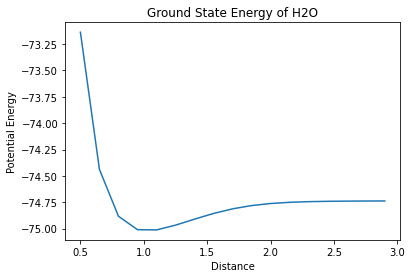

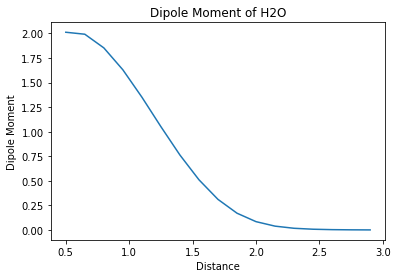

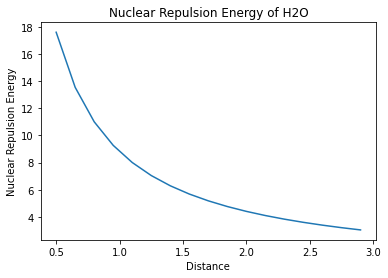

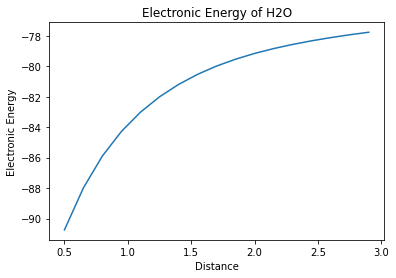

In [10]:
plt.xlabel('Distance')
plt.ylabel('Potential Energy')
plt.title('Ground State Energy of H2O')
plt.plot(num[4],num[0])
plt.show()

plt.xlabel('Distance')
plt.ylabel('Dipole Moment')
plt.title('Dipole Moment of H2O')
plt.plot(num[4],num[1])
plt.show()

plt.xlabel('Distance')
plt.ylabel('Nuclear Repulsion Energy')
plt.title('Nuclear Repulsion Energy of H2O')
plt.plot(num[4],num[2])
plt.show()

plt.xlabel('Distance')
plt.ylabel('Electronic Energy')
plt.title('Electronic Energy of H2O')
plt.plot(num[4],num[3])
plt.show()